In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.float_format" , lambda x : "%.4f" %x)
pd.set_option("display.width", 200)

In [3]:
from warnings import filterwarnings
import gc
filterwarnings("ignore", category= DeprecationWarning)
filterwarnings("ignore", category= FutureWarning)
filterwarnings("ignore")

In [4]:
%%time

path = "/Users/gokhanersoz/Desktop/GitHub/Fraud/Fraud_Data"

train = pd.read_csv(f"{path}/train.csv",index_col=0)
test = pd.read_csv(f"{path}/test.csv",index_col=0)

print("Train Shape : {}".format(train.shape))
print("Test Shape : {}".format(test.shape))
gc.collect()

Train Shape : (590021, 457)
Test Shape : (506691, 456)
CPU times: user 23.3 s, sys: 3.65 s, total: 26.9 s
Wall time: 27 s


0

In [5]:
train_cat_cols = [col for col in train.columns if train[col].dtype == "object"]
test_cat_cols = [col for col in test.columns if test[col].dtype == "object"]

for col in train_cat_cols:
    
    train[col].fillna("UnKnown",inplace = True)
    
for col in test_cat_cols:
    
    test[col].fillna("UnKnown",inplace = True)

In [6]:
pd.Series(train_cat_cols).to_csv("/Users/gokhanersoz/Desktop/GitHub/Fraud/Fraud_Data/train_cats.csv")
pd.Series(test_cat_cols).to_csv("/Users/gokhanersoz/Desktop/GitHub/Fraud/Fraud_Data/test_cats.csv")

In [7]:
# Control !!!

for col in train_cat_cols:
    if train[col].isnull().sum() > 0:
        print(col)
        
for col in test_cat_cols:
    if test[col].isnull().sum() > 0:
        print(col)

In [8]:
from sklearn.decomposition import PCA

In [9]:
data_V = ["V"+str(i) for i in range(1,340) if i != 107]

for V in data_V:
    train[V].fillna(0, inplace = True)
    test[V].fillna( 0, inplace = True)

In [10]:
train[data_V].head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,117.0000,0.0000,0.0000,0.0000,0.0000,0.0000,117.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,117.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,117.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.00

In [11]:
test[data_V].head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,47.9500,0.0000,0.0000,47.9500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,47.9500,0.0000,0.0000,47.9500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1

In [12]:
from sklearn.decomposition import PCA

pca = PCA()

pca_model = pca.fit_transform(train[data_V])

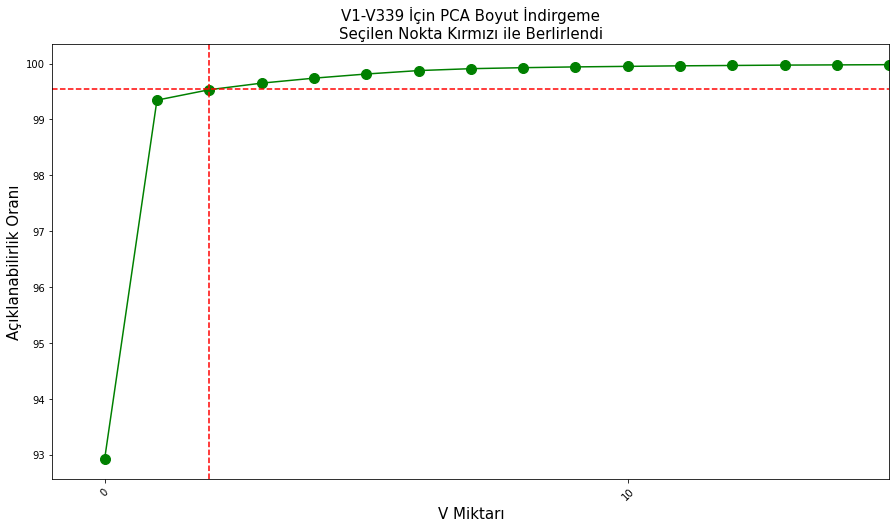

In [13]:
plt.figure(figsize = (15,8))

plt.plot(np.cumsum(pca.explained_variance_ratio_)* 100,"go-",markersize = 10)

size = 15
plt.title("V1-V339 İçin PCA Boyut İndirgeme\nSeçilen Nokta Kırmızı ile Berlirlendi",fontsize = size)
plt.xlabel("V Miktarı",fontsize = size)
plt.ylabel("Açıklanabilirlik Oranı",fontsize = size)
plt.xticks(range(0,340,10),rotation = 45)
plt.xlim([-1,15])

plt.axhline(99.550284,ls = "--",color = "r")
plt.axvline(2,ls = "--",c = "r")
plt.show()

In [14]:
# Final Model For PCA

final_pca = PCA(n_components=3,)
final_pca_model_train = final_pca.fit_transform(train[data_V])

In [15]:
final_pca_model_test = final_pca.transform(test[data_V])

In [16]:
V_Dataframe_Train = pd.DataFrame(data = final_pca_model_train, columns = ["PCA_V_"+str(i) for i in range(1,4)])
V_Dataframe_Test = pd.DataFrame(data = final_pca_model_test, columns = ["PCA_V_"+str(i) for i in range(1,4)])

In [17]:
print("PCA V Train : {}".format(V_Dataframe_Train.shape))
print("PCA V Test  : {}".format(V_Dataframe_Test.shape))
print("\n\n")
print("Train Shape : {}".format(train.shape))
print("Test Shape : {}".format(test.shape))
gc.collect()

PCA V Train : (590021, 3)
PCA V Test  : (506691, 3)



Train Shape : (590021, 457)
Test Shape : (506691, 456)


3977

In [18]:
V_Dataframe_Train.isnull().sum()

PCA_V_1    0
PCA_V_2    0
PCA_V_3    0
dtype: int64

In [19]:
V_Dataframe_Test.isnull().sum()

PCA_V_1    0
PCA_V_2    0
PCA_V_3    0
dtype: int64

In [20]:
train.drop(data_V,axis = 1, inplace = True)
test.drop(data_V, axis = 1, inplace = True)

print("Train Shape : {}".format(train.shape))
print("Test Shape : {}".format(test.shape))
gc.collect()

Train Shape : (590021, 119)
Test Shape : (506691, 118)


60

In [21]:
train.reset_index().index.tolist() == V_Dataframe_Train.index.tolist()

True

In [22]:
#train.reset_index(drop=True)

In [23]:
train = pd.concat([train.reset_index(drop=True) ,V_Dataframe_Train]   ,axis = 1 )
test  = pd.concat([test.reset_index(drop=True)  ,V_Dataframe_Test ]   ,axis = 1 )

print("Train Shape : {}".format(train.shape))
print("Test Shape : {}".format(test.shape))

Train Shape : (590021, 122)
Test Shape : (506691, 121)


In [24]:
gc.collect()

20

In [25]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,days,day_risk,hours,hours_risk,LogTransactionAmt,Risk_TransactionAmt,Risk_ProductCD,card3_feature,addr1_risk,Dist1_Risk,Dist2_Risk,OS_id_30,Version_id_30,Browser_id_31,Version_id_31,Width_id_33,Height_id_33,DeviceCorp,Trans_min_mean,Trans_min_std,TransactionAmt_to_mean_card1,TransactionAmt_to_mean_card4,TransactionAmt_to_std_card1,TransactionAmt_to_std_card4,PCA_V_1,PCA_V_2,PCA_V_3
0,2987000,0,86400,68.5000,W,13926,NaN,150.0000,discover,142.0000,credit,315.0000,87.0000,19.0000,NaN,UnKnown,UnKnown,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,2.0000,0.0000,1.0000,1.0000,14.0000,NaN,13.0000,NaN,NaN,NaN,NaN,NaN,NaN,13.0000,13.0000,NaN,NaN,NaN,0.0000,T,T,T,M2,F,T,UnKnown,UnKnown,UnKnown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UnKnown,NaN,NaN,UnKnown,UnKnown,NaN,NaN,NaN,NaN,NaN,NaN,UnKnown,NaN,NaN,NaN,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,NaN,unknownxunknown,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,1,HighRiskDays,1,LowRiskHours,4.2268,HighRisk,MiddleRiskProductCD,Negative,NoInf,HighDist1Risk,LowDist2Risk,UnKnown,No.Version,UnKnown,No.Version,unknown,unknown,UNKNOWN,-66.4927,-0.2866,0.1946,0.2578,0.1846,0.1702,-6607.6746,-772.0429,30.5499
1,2987001,0,86401,29.0000,W,2755,404.0000,150.0000,mastercard,102.0000,credit,325.0000,87.0000,NaN,NaN,Google,UnKnown,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,0.0000,UnKnown,UnKnown,UnKnown,M0,T,T,UnKnown,UnKnown,UnKnown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UnKnown,NaN,NaN,UnKnown,UnKnown,NaN,NaN,NaN,NaN,NaN,NaN,UnKnown,NaN,NaN,NaN,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,NaN,unknownxunknown,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,1,HighRiskDays,1,LowRiskHours,3.3673,LowRisk,MiddleRiskProductCD,Negative,Addr1Risk,LowDist1Risk,LowDist2Risk,UnKnown,No.Version,UnKnown,No.Version,unknown,unknown,UNKNOWN,-105.9927,-0.4569,0.1238,0.2195,0.0630,0.1250,-6607.4911,-900.2382,-45.3510
2,2987002,0,86469,59.0000,W,4663,490.0000,150.0000,visa,166.0000,debit,330.0000,87.0000,287.0000,NaN,Hotmail,UnKnown,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,0.0000,315.0000,NaN,NaN,NaN,315.0000,T,T,T,M0,F,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UnKnown,NaN,NaN,UnKnown,UnKnown,NaN,NaN,NaN,NaN,NaN,NaN,UnKnown,NaN,NaN,NaN,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,NaN,unknownxunknown,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,1,HighRiskDays,1,LowRiskHours,4.0775,HighRisk,MiddleRiskProductCD,Negative,Addr1Risk,HighDist1Risk,LowDist2Risk,UnKnown,No.Version,UnKnown,No.Version,unknown,unknown,UNKNOWN,-75.9927,-0.3276,0.6081,0.4428,0.5892,0.2585,-6607.4911,-900.2382,-45.3508
3,2987003,0,86499,50.0000,W,18132,567.0000,150.0000,mastercard,117.0000,debit,476.0000,87.0000,NaN,NaN,Yahoo,UnKnown,2.0000,5.0000,0.0000,0.0000,0.0000,4.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,25.0000,1.0000,112.0000,112.0000,0.0000,94.0000,0.0000,NaN,NaN,NaN,NaN,84.0000,NaN,NaN,NaN,NaN,111.0000,UnKnown,UnKnown,UnKnown,M0,T,F,UnKnown,UnKnown,UnKnown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UnKnown,NaN,NaN,UnKnown,UnKnown,NaN,NaN,NaN,NaN,NaN,NaN,UnKnown,NaN,NaN,NaN,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,NaN,unknownxunknown,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,1,HighRiskDays,1,LowRiskHours,3.9120,HighRisk,MiddleRiskPr

In [26]:
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo,days,day_risk,hours,hours_risk,LogTransactionAmt,Risk_TransactionAmt,Risk_ProductCD,card3_feature,addr1_risk,Dist1_Risk,Dist2_Risk,OS_id_30,Version_id_30,Browser_id_31,Version_id_31,Width_id_33,Height_id_33,DeviceCorp,Trans_min_mean,Trans_min_std,TransactionAmt_to_mean_card1,TransactionAmt_to_mean_card4,TransactionAmt_to_std_card1,TransactionAmt_to_std_card4,PCA_V_1,PCA_V_2,PCA_V_3
0,3663549,18403224,31.9500,W,10409,111.0000,150.0000,visa,226.0000,debit,170.0000,87.0000,1.0000,NaN,Google,UnKnown,6.0000,6.0000,0.0000,0.0000,3.0000,4.0000,0.0000,0.0000,6.0000,0.0000,5.0000,1.0000,115.0000,6.0000,419.0000,419.0000,27.0000,398.0000,27.0000,NaN,NaN,NaN,NaN,418.0000,203.0000,NaN,NaN,NaN,409.0000,T,T,F,UnKnown,UnKnown,F,T,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UnKnown,NaN,NaN,UnKnown,UnKnown,NaN,NaN,NaN,NaN,NaN,NaN,UnKnown,NaN,NaN,NaN,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,NaN,unknownxunknown,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,7,HighRiskDays,1,LowRiskHours,3.4642,HighRisk,MiddleRiskProductCD,Negative,NoInf,HighDist1Risk,LowDist2Risk,UnKnown,No.Version,UnKnown,No.Version,unknown,unknown,UNKNOWN,-102.7756,-0.4182,0.3393,0.2373,0.2604,0.1298,-6607.5614,-871.9692,-27.2619
1,3663550,18403263,49.0000,W,4272,111.0000,150.0000,visa,226.0000,debit,299.0000,87.0000,4.0000,NaN,aol.com,UnKnown,3.0000,2.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,2.0000,0.0000,1.0000,1.0000,12.0000,2.0000,149.0000,149.0000,7.0000,634.0000,7.0000,NaN,NaN,NaN,NaN,231.0000,634.0000,NaN,NaN,NaN,634.0000,T,F,F,M0,UnKnown,F,UnKnown,UnKnown,UnKnown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UnKnown,NaN,NaN,UnKnown,UnKnown,NaN,NaN,NaN,NaN,NaN,NaN,UnKnown,NaN,NaN,NaN,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,NaN,unknownxunknown,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,7,HighRiskDays,1,LowRiskHours,3.8918,HighRisk,MiddleRiskProductCD,Negative,NoInf,HighDist1Risk,LowDist2Risk,UnKnown,No.Version,UnKnown,No.Version,unknown,unknown,UNKNOWN,-85.7256,-0.3488,0.3335,0.3639,0.1343,0.1991,-6607.9515,-703.4290,76.4686
2,3663551,18403310,171.0000,W,4476,574.0000,150.0000,visa,226.0000,debit,472.0000,87.0000,2635.0000,NaN,Hotmail,UnKnown,2.0000,2.0000,0.0000,0.0000,0.0000,5.0000,0.0000,0.0000,4.0000,0.0000,2.0000,0.0000,22.0000,2.0000,137.0000,137.0000,10.0000,97.0000,10.0000,NaN,NaN,NaN,NaN,136.0000,136.0000,NaN,NaN,NaN,97.0000,T,T,F,M0,F,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UnKnown,NaN,NaN,UnKnown,UnKnown,NaN,NaN,NaN,NaN,NaN,NaN,UnKnown,NaN,NaN,NaN,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,NaN,unknownxunknown,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,7,HighRiskDays,1,LowRiskHours,5.1417,HighRisk,MiddleRiskProductCD,Negative,NoInf,LowDist1Risk,LowDist2Risk,UnKnown,No.Version,UnKnown,No.Version,unknown,unknown,UNKNOWN,36.2744,0.1476,1.4855,1.2700,1.8958,0.6949,-6609.1210,-217.2663,405.5271
3,3663552,18403310,284.9500,W,10989,360.0000,150.0000,visa,166.0000,debit,205.0000,87.0000,17.0000,NaN,Google,UnKnown,5.0000,2.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,2.0000,0.0000,2.0000,0.0000,7.0000,4.0000,42.0000,42.0000,41.0000,242.0000,41.0000,NaN,NaN,NaN,NaN,242.0000,242.0000,NaN,NaN,NaN,242.0000,T,T,T,UnKnown,UnKnown,T,UnKnown,UnKnown,UnKnown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UnKnown,NaN,NaN,UnKnown,UnKnown,NaN,NaN,NaN,NaN,NaN,NaN,UnKnown,NaN,NaN,NaN,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,NaN,unknownxunknown,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,7,HighRiskDays,1,LowRiskHours,

In [27]:
train_num_cols = [col for col in train.columns if train[col].dtype != "object" and col not in ["TransactionID",
                                                                                         "isFraud"]]
test_num_cols = [col for col in test.columns if test[col].dtype != "object" and col not in ["TransactionID",
                                                                                         "isFraud"]]

for col in train_num_cols:
    
    print("{} NaN Values: {}".format(col, train[col].isnull().sum()))

TransactionDT NaN Values: 0
TransactionAmt NaN Values: 0
card1 NaN Values: 0
card2 NaN Values: 8932
card3 NaN Values: 1565
card5 NaN Values: 4255
addr1 NaN Values: 65200
addr2 NaN Values: 65200
dist1 NaN Values: 351765
dist2 NaN Values: 552624
C1 NaN Values: 0
C2 NaN Values: 0
C3 NaN Values: 0
C4 NaN Values: 0
C5 NaN Values: 0
C6 NaN Values: 0
C7 NaN Values: 0
C8 NaN Values: 0
C9 NaN Values: 0
C10 NaN Values: 0
C11 NaN Values: 0
C12 NaN Values: 0
C13 NaN Values: 0
C14 NaN Values: 0
D1 NaN Values: 1269
D2 NaN Values: 280429
D3 NaN Values: 262571
D4 NaN Values: 168913
D5 NaN Values: 309577
D6 NaN Values: 517331
D7 NaN Values: 551351
D8 NaN Values: 515329
D9 NaN Values: 515329
D10 NaN Values: 75516
D11 NaN Values: 278781
D12 NaN Values: 525810
D13 NaN Values: 528488
D14 NaN Values: 528215
D15 NaN Values: 89112
id_01 NaN Values: 446227
id_02 NaN Values: 449583
id_03 NaN Values: 523915
id_04 NaN Values: 523915
id_05 NaN Values: 453580
id_06 NaN Values: 453580
id_07 NaN Values: 584870
id_08 

In [28]:
pd.Series(train_num_cols).to_csv("/Users/gokhanersoz/Desktop/GitHub/Fraud/Fraud_Data/train_nums.csv")
pd.Series(test_num_cols).to_csv("/Users/gokhanersoz/Desktop/GitHub/Fraud/Fraud_Data/test_nums.csv")

In [29]:
def replace_inf_to_nan(dataframe,col):
    
    dataframe[col].replace([np.inf,-np.inf], np.nan,inplace = True)

In [30]:
def check_inf(dataframe,col):
    
    sum_inf = sum(np.isinf(dataframe[col]))
    sum_neginf = sum(np.isneginf(dataframe[col]))
    if sum_inf > 0 or sum_neginf > 0:
        
        print("{} Columns Have INF or NegINF Values ...".format(col))

In [31]:
for col in train_num_cols:
    
    check_inf(train,col)

TransactionAmt_to_std_card1 Columns Have INF or NegINF Values ...


In [32]:
for col in test_num_cols:
    
    check_inf(test,col)

TransactionAmt_to_std_card1 Columns Have INF or NegINF Values ...


In [33]:
for col in train_num_cols:
    
    replace_inf_to_nan(train,col)
    
for col in test_num_cols:
    
    replace_inf_to_nan(test,col)

In [34]:
for col in train_num_cols:
    
    check_inf(train,col)
    
for col in test_num_cols:
    
    check_inf(test,col)

In [35]:
#for col in test_cat_cols:
    
#    print("{} NaN Values : {}".format(col, test[col].isnull().sum()))

#for col in train_cat_cols:
    
#    print("{} NaN Values : {}".format(col, train[col].isnull().sum()))

In [36]:
def missing_graph(dataframe,cols,percentage = 50):
    
    
    data = pd.DataFrame()
    data["Missing(%)"] = dataframe[cols].isnull().sum() / len(dataframe) * 100
    data["Name"] = [col for col in cols]
    data = data.sort_values("Missing(%)",ascending = False)

    plt.figure(figsize = (15,8))
    
    try:
        sns.barplot(x = "Missing(%)", y = "Name", data = data[data["Missing(%)"] > percentage])
    except:
        pass
    
    size = 15
    
    plt.ylabel("Name",fontsize = size)
    plt.xlabel("Missing Percentage Values", fontsize = size)
    plt.title(f"Eksik Değerlerin Yüzdelik Değerleri\n(%{percentage} Eksik Değer)", fontsize = size)
    plt.show()
    
    return data

In [37]:
def na_control(dataframe):
    
    liste = []
    
    for col in dataframe.columns:

        na_values = dataframe[col].isnull().sum()

        if na_values > 0:

            liste.append( (col,na_values) )
    
    if len(liste) > 0:
        
        for col_name,na_values in liste:
            
            print(f"{col_name.upper()} Na Values : {na_values}")
    
    else:
        
        print("Boş Değer Yok !!!!!")

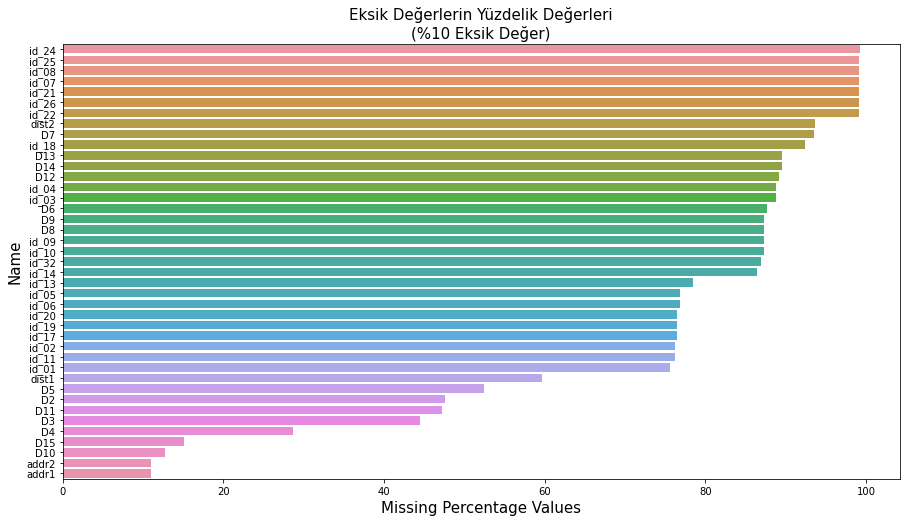

In [38]:
missing_nums = missing_graph(train,train_num_cols,percentage=10)

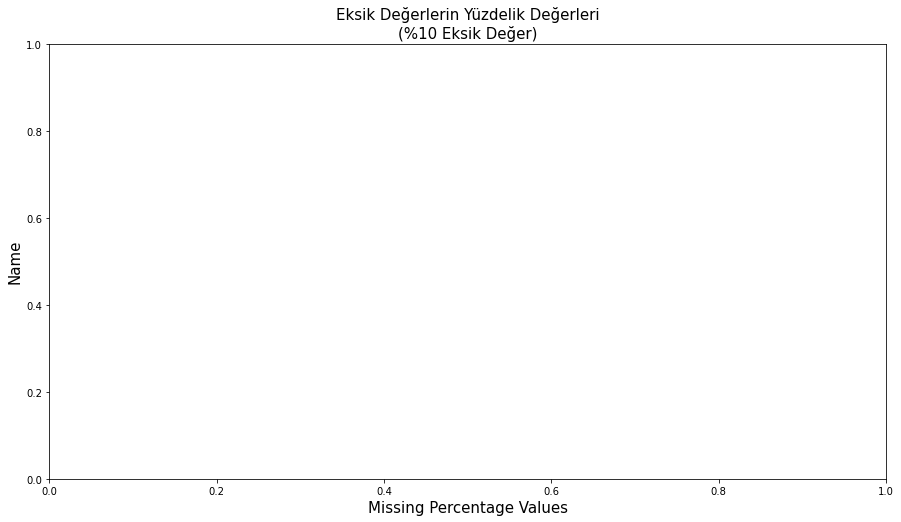

In [39]:
missing_cats = missing_graph(train,train_cat_cols,percentage=10)

In [40]:
missing_cats.T

,ProductCD,Risk_ProductCD,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,day_risk,hours_risk,Risk_TransactionAmt,card3_feature,card4,addr1_risk,Dist1_Risk,Dist2_Risk,OS_id_30,Version_id_30,Browser_id_31,Version_id_31,Width_id_33,Height_id_33,id_34,id_33,id_31,id_30,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_12,id_15,id_16,id_23,id_27,id_28,id_29,DeviceCorp
Missing(%),0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Name,ProductCD,Risk_ProductCD,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,day_risk,hours_risk,Risk_TransactionAmt,card3_feature,card4,addr1_risk,Dist1_Risk,Dist2_Risk,OS_id_30,Version_id_30,Browser_id_31,Version_id_31,Width_id_33,Height_id_33,id_34,id_33,id_31,id_30,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_12,id_15,id_16,id_23,id_27,id_28,id_29,DeviceCorp


In [41]:
missing_nums.T

,id_24,id_25,id_08,id_07,id_21,id_26,id_22,dist2,D7,id_18,D13,D14,D12,id_04,id_03,D6,D9,D8,id_09,id_10,id_32,id_14,id_13,id_05,id_06,id_20,id_19,id_17,id_02,id_11,id_01,dist1,D5,D2,D11,D3,D4,D15,D10,addr2,addr1,card2,TransactionAmt_to_std_card1,card5,TransactionAmt_to_mean_card4,TransactionAmt_to_std_card4,card3,D1,LogTransactionAmt,TransactionAmt_to_mean_card1,PCA_V_1,hours,Trans_min_mean,days,PCA_V_2,Trans_min_std,TransactionDT,TransactionAmt,C6,card1,C1,C2,C3,C4,C5,C7,C14,C8,C9,C10,C11,C12,C13,PCA_V_3
Missing(%),99.1955,99.1309,99.1270,99.1270,99.1263,99.1256,99.1246,93.6618,93.4460,92.3706,89.5710,89.5248,89.1172,88.7960,88.7960,87.6801,87.3408,87.3408,87.3408,87.3408,86.8503,86.4379,78.4882,76.8752,76.8752,76.4703,76.4607,76.4520,76.1978,76.1798,75.6290,59.6191,52.4688,47.5286,47.2493,44.5020,28.6283,15.1032,12.7989,11.0505,11.0505,1.5138,0.8296,0.7212,0.2673,0.2673,0.2652,0.2151,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Name,id_24,id_25,id_08,id_07,id_21,id_26,id_22,dist2,D7,id_18,D13,D14,D12,id_04,id_03,D6,D9,D8,id_09,id_10,id_32,id_14,id_13,id_05,id_06,id_20,id_19,id_17,id_02,id_11,id_01,dist1,D5,D2,D11,D3,D4,D15,D10,addr2,addr1,card2,TransactionAmt_to_std_card1,card5,TransactionAmt_to_mean_card4,TransactionAmt_to_std_card4,card3,D1,LogTransactionAmt,TransactionAmt_to_mean_card1,PCA_V_1,hours,Trans_min_mean,days,PCA_V_2,Trans_min_std,TransactionDT,TransactionAmt,C6,card1,C1,C2,C3,C4,C5,C7,C14,C8,C9,C10,C11,C12,C13,PCA_V_3


In [42]:
train_missing_gt_50 = missing_nums[missing_nums["Missing(%)"] > 50]["Name"].tolist()

pd.DataFrame(train_missing_gt_50).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,id_24,id_25,id_08,id_07,id_21,id_26,id_22,dist2,D7,id_18,D13,D14,D12,id_04,id_03,D6,D9,D8,id_09,id_10,id_32,id_14,id_13,id_05,id_06,id_20,id_19,id_17,id_02,id_11,id_01,dist1,D5


In [43]:
test_missing_gt_50 = pd.Series(train_missing_gt_50).replace("_","-",regex = True).tolist()

pd.DataFrame(test_missing_gt_50).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,id-24,id-25,id-08,id-07,id-21,id-26,id-22,dist2,D7,id-18,D13,D14,D12,id-04,id-03,D6,D9,D8,id-09,id-10,id-32,id-14,id-13,id-05,id-06,id-20,id-19,id-17,id-02,id-11,id-01,dist1,D5


In [44]:
for data in [train, test]:
    na_control(data)

CARD2 Na Values : 8932
CARD3 Na Values : 1565
CARD5 Na Values : 4255
ADDR1 Na Values : 65200
ADDR2 Na Values : 65200
DIST1 Na Values : 351765
DIST2 Na Values : 552624
D1 Na Values : 1269
D2 Na Values : 280429
D3 Na Values : 262571
D4 Na Values : 168913
D5 Na Values : 309577
D6 Na Values : 517331
D7 Na Values : 551351
D8 Na Values : 515329
D9 Na Values : 515329
D10 Na Values : 75516
D11 Na Values : 278781
D12 Na Values : 525810
D13 Na Values : 528488
D14 Na Values : 528215
D15 Na Values : 89112
ID_01 Na Values : 446227
ID_02 Na Values : 449583
ID_03 Na Values : 523915
ID_04 Na Values : 523915
ID_05 Na Values : 453580
ID_06 Na Values : 453580
ID_07 Na Values : 584870
ID_08 Na Values : 584870
ID_09 Na Values : 515329
ID_10 Na Values : 515329
ID_11 Na Values : 449477
ID_13 Na Values : 463097
ID_14 Na Values : 510002
ID_17 Na Values : 451083
ID_18 Na Values : 545006
ID_19 Na Values : 451134
ID_20 Na Values : 451191
ID_21 Na Values : 584866
ID_22 Na Values : 584856
ID_24 Na Values : 585274
I

In [45]:
for col in train_num_cols:
    
    col_median = train[col].median()
    
    train[col].fillna(col_median, inplace = True)    

In [46]:
for col in test_num_cols:
    
    col_median = test[col].median()
    
    test[col].fillna(col_median, inplace = True)        

In [47]:
for data in [train, test]:
    na_control(data)

Boş Değer Yok !!!!!
Boş Değer Yok !!!!!


In [48]:
len(train_cat_cols) == len([col for col in train.columns if train[col].dtype == "object"])

True

In [49]:
len(test_cat_cols) == len([col for col in test.columns if test[col].dtype == "object"])

True

In [50]:
len(train_cat_cols),len([col for col in train.columns if train[col].dtype == "object"])

(46, 46)

In [51]:
len(test_cat_cols) ,len([col for col in test.columns if test[col].dtype == "object"])

(46, 46)

In [52]:
def label_encoder(dataframe,cat_cols):
    
    from sklearn.preprocessing import LabelEncoder
    
    for cat in cat_cols:
        
        dataframe[cat] = LabelEncoder().fit_transform(dataframe[cat])

In [53]:
label_encoder(train, train_cat_cols)
label_encoder(test , test_cat_cols)

In [54]:
def check_object(dataframe):
    
    liste = [col for col in dataframe.columns if dataframe[col].dtype == "object"]
    
    if len(liste) > 0 :
        
        for col in liste:
            
            print(f"{col.upper()} : Bu Feature Object Değerdir....")
            
    else:
        
        print("Object Değer Yoktur !!!!")

In [55]:
check_object(train)
check_object(test)

Object Değer Yoktur !!!!
Object Değer Yoktur !!!!


In [56]:
train[train_cat_cols].head()

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,day_risk,hours_risk,Risk_TransactionAmt,Risk_ProductCD,card3_feature,addr1_risk,Dist1_Risk,Dist2_Risk,OS_id_30,Version_id_30,Browser_id_31,Version_id_31,Width_id_33,Height_id_33,DeviceCorp
0,4,2,1,4,4,1,1,1,2,0,1,2,2,2,2,2,2,3,2,2,2,41,14,260,0,2,2,2,2,0,1555,0,0,0,2,0,1,0,1,4,66,14,74,155,138,12
1,4,3,1,1,4,2,2,2,0,1,1,2,2,2,2,2,2,3,2,2,2,41,14,260,0,2,2,2,2,0,1555,0,0,1,2,0,0,1,1,4,66,14,74,155,138,12
2,4,4,2,2,4,1,1,1,0,0,0,0,0,0,2,2,2,3,2,2,2,41,14,260,0,2,2,2,2,0,1555,0,0,0,2,0,0,0,1,4,66,14,74,155,138,12
3,4,3,2,5,4,2,2,2,0,1,0,2,2,2,2,2,2,3,2,2,2,41,14,260,0,2,2,2,2,0,1555,0,0,0,2,0,1,1,1,4,66,14,74,155,138,12
4,1,3,1,1,4,2,2,2,3,2,2,2,2,2,1,1,1,3,2,1,1,7,124,164,4,1,0,1,1,2,953,0,0,0,1,0,1,1,1,0,58,59,12,86,12,9


In [57]:
test[test_cat_cols].head()

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9,id-12,id-15,id-16,id-23,id-27,id-28,id-29,id-30,id-31,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo,day_risk,hours_risk,Risk_TransactionAmt,Risk_ProductCD,card3_feature,addr1_risk,Dist1_Risk,Dist2_Risk,OS_id_30,Version_id_30,Browser_id_31,Version_id_31,Width_id_33,Height_id_33,DeviceCorp
0,4,4,2,1,4,1,1,0,3,2,0,1,1,1,2,2,2,3,2,2,2,47,0,390,0,2,2,2,2,0,1986,0,0,0,2,0,1,0,1,4,76,0,93,210,177,12
1,4,4,2,7,4,1,0,0,0,2,0,2,2,2,2,2,2,3,2,2,2,47,0,390,0,2,2,2,2,0,1986,0,0,0,2,0,1,0,1,4,76,0,93,210,177,12
2,4,4,2,2,4,1,1,0,0,0,0,0,0,0,2,2,2,3,2,2,2,47,0,390,0,2,2,2,2,0,1986,0,0,0,2,0,1,1,1,4,76,0,93,210,177,12
3,4,4,2,1,4,1,1,1,3,2,1,2,2,2,2,2,2,3,2,2,2,47,0,390,0,2,2,2,2,0,1986,0,0,1,2,0,1,0,1,4,76,0,93,210,177,12
4,4,3,2,1,4,1,1,1,3,2,0,0,1,1,2,2,2,3,2,2,2,47,0,390,0,2,2,2,2,0,1986,0,0,0,2,0,1,0,1,4,76,0,93,210,177,12


In [58]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,days,day_risk,hours,hours_risk,LogTransactionAmt,Risk_TransactionAmt,Risk_ProductCD,card3_feature,addr1_risk,Dist1_Risk,Dist2_Risk,OS_id_30,Version_id_30,Browser_id_31,Version_id_31,Width_id_33,Height_id_33,DeviceCorp,Trans_min_mean,Trans_min_std,TransactionAmt_to_mean_card1,TransactionAmt_to_mean_card4,TransactionAmt_to_std_card1,TransactionAmt_to_std_card4,PCA_V_1,PCA_V_2,PCA_V_3
0,2987000,0,86400,68.5000,4,13926,361.0000,150.0000,2,142.0000,1,315.0000,87.0000,19.0000,37.0000,4,4,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,2.0000,0.0000,1.0000,1.0000,14.0000,97.0000,13.0000,26.0000,10.0000,0.0000,0.0000,37.9167,0.6667,13.0000,13.0000,0.0000,0.0000,0.0000,0.0000,1,1,1,2,0,1,2,2,2,-5.0000,125685.5000,0.0000,0.0000,0.0000,0.0000,14.0000,-34.0000,0.0000,0.0000,100.0000,2,52.0000,-300.0000,2,2,166.0000,15.0000,341.0000,472.0000,252.0000,14.0000,3,11.0000,321.0000,149.0000,2,2,2,41,14,24.0000,260,0,2,2,2,2,0,1555,1,0,1,0,4.2268,0,2,0,1,0,1,4,66,14,74,155,138,12,-66.4927,-0.2866,0.1946,0.2578,0.1846,0.1702,-6607.6746,-772.0429,30.5499
1,2987001,0,86401,29.0000,4,2755,404.0000,150.0000,3,102.0000,1,325.0000,87.0000,8.0000,37.0000,1,4,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,97.0000,8.0000,0.0000,10.0000,0.0000,0.0000,37.9167,0.6667,0.0000,43.0000,0.0000,0.0000,0.0000,0.0000,2,2,2,0,1,1,2,2,2,-5.0000,125685.5000,0.0000,0.0000,0.0000,0.0000,14.0000,-34.0000,0.0000,0.0000,100.0000,2,52.0000,-300.0000,2,2,166.0000,15.0000,341.0000,472.0000,252.0000,14.0000,3,11.0000,321.0000,149.0000,2,2,2,41,14,24.0000,260,0,2,2,2,2,0,1555,1,0,1,0,3.3673,1,2,0,0,1,1,4,66,14,74,155,138,12,-105.9927,-0.4569,0.1238,0.2195,0.0630,0.1250,-6607.4911,-900.2382,-45.3510
2,2987002,0,86469,59.0000,4,4663,490.0000,150.0000,4,166.0000,2,330.0000,87.0000,287.0000,37.0000,2,4,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,97.0000,8.0000,0.0000,10.0000,0.0000,0.0000,37.9167,0.6667,0.0000,315.0000,0.0000,0.0000,0.0000,315.0000,1,1,1,0,0,0,0,0,0,-5.0000,125685.5000,0.0000,0.0000,0.0000,0.0000,14.0000,-34.0000,0.0000,0.0000,100.0000,2,52.0000,-300.0000,2,2,166.0000,15.0000,341.0000,472.0000,252.0000,14.0000,3,11.0000,321.0000,149.0000,2,2,2,41,14,24.0000,260,0,2,2,2,2,0,1555,1,0,1,0,4.0775,0,2,0,0,0,1,4,66,14,74,155,138,12,-75.9927,-0.3276,0.6081,0.4428,0.5892,0.2585,-6607.4911,-900.2382,-45.3508
3,2987003,0,86499,50.0000,4,18132,567.0000,150.0000,3,117.0000,2,476.0000,87.0000,8.0000,37.0000,5,4,2.0000,5.0000,0.0000,0.0000,0.0000,4.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,25.0000,1.0000,112.0000,112.0000,0.0000,94.0000,0.0000,0.0000,0.0000,37.9167,0.6667,84.0000,43.0000,0.0000,0.0000,0.0000,111.0000,2,2,2,0,1,0,2,2,2,-5.0000,125685.5000,0.0000,0.0000,0.0000,0.0000,14.0000,-34.0000,0.0000,0.0000,100.0000,2,52.0000,-300.0000,2,2,166.0000,15.0000,341.0000,472.0000,252.0000,14.0000,3,11.0000,321.0000,149.0000,2,2,2,41,14,24.0000,260,0,2,2,2,2,0,1555,1,0,1,0,3.9120,0,2,0,1,1,1,4,66,14,74,155,138,12,-84.9927,-0.3664,0.4051,0.3784,0.2594,0.2155,-6610.9864,1551.4786,1335.5361
4,2987004,0,86506,50.0000,1,4497,514.0000,150.0000,3,102.0000,1,420.0000,87.0000,8.0000,37.0000,1,4,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,1.0000,0.0000,97.0000,8.0000,26.0000,10.0000,0.0000,0.0000,37.9167,0.6667,15.0000,43.0000,0.0000,0.0000,0.0000,52.0000,2,2,2,3,2,2,2,2,2,0.0000,70787.0

In [59]:
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo,days,day_risk,hours,hours_risk,LogTransactionAmt,Risk_TransactionAmt,Risk_ProductCD,card3_feature,addr1_risk,Dist1_Risk,Dist2_Risk,OS_id_30,Version_id_30,Browser_id_31,Version_id_31,Width_id_33,Height_id_33,DeviceCorp,Trans_min_mean,Trans_min_std,TransactionAmt_to_mean_card1,TransactionAmt_to_mean_card4,TransactionAmt_to_std_card1,TransactionAmt_to_std_card4,PCA_V_1,PCA_V_2,PCA_V_3
0,3663549,18403224,31.9500,4,10409,111.0000,150.0000,4,226.0000,2,170.0000,87.0000,1.0000,44.0000,1,4,6.0000,6.0000,0.0000,0.0000,3.0000,4.0000,0.0000,0.0000,6.0000,0.0000,5.0000,1.0000,115.0000,6.0000,419.0000,419.0000,27.0000,398.0000,27.0000,0.0000,0.0000,37.7083,0.6667,418.0000,203.0000,0.0000,0.0000,0.0000,409.0000,1,1,0,3,2,0,1,1,1,-5.0000,133189.5000,0.0000,0.0000,0.0000,0.0000,12.0000,-33.0000,0.0000,0.0000,100.0000,2,27.0000,-300.0000,2,2,166.0000,15.0000,321.0000,484.0000,576.0000,14.0000,3,11.0000,321.0000,147.0000,2,2,2,47,0,24.0000,390,0,2,2,2,2,0,1986,7,0,1,0,3.4642,0,2,0,1,0,1,4,76,0,93,210,177,12,-102.7756,-0.4182,0.3393,0.2373,0.2604,0.1298,-6607.5614,-871.9692,-27.2619
1,3663550,18403263,49.0000,4,4272,111.0000,150.0000,4,226.0000,2,299.0000,87.0000,4.0000,44.0000,7,4,3.0000,2.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,2.0000,0.0000,1.0000,1.0000,12.0000,2.0000,149.0000,149.0000,7.0000,634.0000,7.0000,0.0000,0.0000,37.7083,0.6667,231.0000,634.0000,0.0000,0.0000,0.0000,634.0000,1,0,0,0,2,0,2,2,2,-5.0000,133189.5000,0.0000,0.0000,0.0000,0.0000,12.0000,-33.0000,0.0000,0.0000,100.0000,2,27.0000,-300.0000,2,2,166.0000,15.0000,321.0000,484.0000,576.0000,14.0000,3,11.0000,321.0000,147.0000,2,2,2,47,0,24.0000,390,0,2,2,2,2,0,1986,7,0,1,0,3.8918,0,2,0,1,0,1,4,76,0,93,210,177,12,-85.7256,-0.3488,0.3335,0.3639,0.1343,0.1991,-6607.9515,-703.4290,76.4686
2,3663551,18403310,171.0000,4,4476,574.0000,150.0000,4,226.0000,2,472.0000,87.0000,2635.0000,44.0000,2,4,2.0000,2.0000,0.0000,0.0000,0.0000,5.0000,0.0000,0.0000,4.0000,0.0000,2.0000,0.0000,22.0000,2.0000,137.0000,137.0000,10.0000,97.0000,10.0000,0.0000,0.0000,37.7083,0.6667,136.0000,136.0000,0.0000,0.0000,0.0000,97.0000,1,1,0,0,0,0,0,0,0,-5.0000,133189.5000,0.0000,0.0000,0.0000,0.0000,12.0000,-33.0000,0.0000,0.0000,100.0000,2,27.0000,-300.0000,2,2,166.0000,15.0000,321.0000,484.0000,576.0000,14.0000,3,11.0000,321.0000,147.0000,2,2,2,47,0,24.0000,390,0,2,2,2,2,0,1986,7,0,1,0,5.1417,0,2,0,1,1,1,4,76,0,93,210,177,12,36.2744,0.1476,1.4855,1.2700,1.8958,0.6949,-6609.1210,-217.2663,405.5271
3,3663552,18403310,284.9500,4,10989,360.0000,150.0000,4,166.0000,2,205.0000,87.0000,17.0000,44.0000,1,4,5.0000,2.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,2.0000,0.0000,2.0000,0.0000,7.0000,4.0000,42.0000,42.0000,41.0000,242.0000,41.0000,0.0000,0.0000,37.7083,0.6667,242.0000,242.0000,0.0000,0.0000,0.0000,242.0000,1,1,1,3,2,1,2,2,2,-5.0000,133189.5000,0.0000,0.0000,0.0000,0.0000,12.0000,-33.0000,0.0000,0.0000,100.0000,2,27.0000,-300.0000,2,2,166.0000,15.0000,321.0000,484.0000,576.0000,14.0000,3,11.0000,321.0000,147.0000,2,2,2,47,0,24.0000,390,0,2,2,2,2,0,1986,7,0,1,0,5.6523,1,2,0,1,0,1,4,76,0,93,210,177,12,150.2244,0.6112,2.9697,2.1163,1.9140,1.1579,-6607.5418,-899.4228,-42.3436
4,3663553,18403317,67.9500,4,18018,452.0000,150.0000,3,117.0000,2,264.0000,87.0000,6.0000,44.0000,1,4,6.0000,6.0000,0.0000,0.0000,2.0000,5.0000,0.0000,0.0000,5.0000,0.0000,6.0000,0.0000,14.0000,6.0000,22.0000,22.0000,0.0000,22.0000,0.0000,0.0000,0.0000,37.7083,0.6667,22.0000,22.0000,0.0000,0.0000,0.0000,22.0000,1,1,1,3,2,0,0,

In [60]:
na_control(train)
na_control(test)

Boş Değer Yok !!!!!
Boş Değer Yok !!!!!


In [61]:
# ALL DATA (NO DROP)

train.to_csv("/Users/gokhanersoz/Desktop/GitHub/Fraud/Fraud_Data/all_train.csv")
test.to_csv("/Users/gokhanersoz/Desktop/GitHub/Fraud/Fraud_Data/all_test.csv")

In [62]:
# DROP DATA

train.drop(train_missing_gt_50, axis = 1).to_csv("/Users/gokhanersoz/Desktop/GitHub/Fraud/Fraud_Data/drop_train.csv")
test.drop(test_missing_gt_50, axis = 1).to_csv("/Users/gokhanersoz/Desktop/GitHub/Fraud/Fraud_Data/drop_test.csv")